# Pregunta de parcial 1 Regresion logistica 1
Diego Roberto Arancibia Delgado
https://github.com/drArancibiaDelgado/sis420-/tree/main/Laboratorios/Lab%202

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

from sklearn.model_selection import train_test_split
import tabulate



# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

##  Regresion Logistica



In [3]:
# Cargar datos
data = pd.read_csv("default of credit card clients.csv")
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [5]:
#aqui se dropeo las columnas que no se utilizaran, dado a que tienen valores que volvia el modelo inestable
data = data.drop(['ID'], axis=1)
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [6]:
#informacion de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [7]:
data


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [8]:
#separacion de datos
# Se separa el conjunto de datos en dos subconjuntos: entrenamiento y prueba
train_dataset, test_dataset = train_test_split(data, test_size=0.2, random_state=25)

X_test = test_dataset.drop(['dpnm'], axis=1).values
y_test = test_dataset['dpnm'].values

X_train = train_dataset.drop(['dpnm'], axis=1).values
y_train = train_dataset['dpnm'].values

In [9]:
def plotData(X, y):
    # Gragica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y
    # o para los negativos.

    # Crea una nueva figura
    fig = pyplot.figure()

    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)


<a id="section1"></a>
###  Implementacion

#### Fución Sigmoidea



In [10]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))
    
    return g

Calculando la sigmoide

In [11]:
# Prueba la implementacion de la funcion sigmoid
z = [0, 0.5, 1]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


In [12]:
# Agrega una columna de unos a X. La función agrega una columna de unos al principio de la matriz X
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [13]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X_train)

# print(X_norm)
print('{:>8s}{:>8s}{:>10s}{:>15s}{:>8s}{:>10s}{:>8s}{:>8s}'.format('X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'y'))
print('-'*200)
for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:15.3f}{:15.3f}{:15.3f}{:15.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:15.3f}{:15.3f}{:15.3f}{:15.3f}{:8.3f}{:8.3f}{:8.3f}'.format(X_norm[i, 0], X_norm[i, 1], X_norm[i, 2], X_norm[i, 3], X_norm[i, 4], X_norm[i, 5], X_norm[i, 6], 
                                                                                 X_norm[i, 7], X_norm[i, 8], X_norm[i, 9], X_norm[i, 10], X_norm[i, 11], X_norm[i, 12], X_norm[i, 13], 
                                                                                 X_norm[i, 14], X_norm[i, 15], X_norm[i, 16], 
                                                                                 y_train[i]))

  X[:,0] X[:, 1]   X[:, 2]        X[:, 3] X[:, 4]   X[:, 5] X[:, 6]       y
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  -0.903  -1.234     1.451          0.851         -0.699          0.906         -0.724  -0.696  -0.666  -0.649    -0.615         -0.695         -0.663         -0.662         -0.672  -0.635  -0.576   0.000
  -0.056  -1.234     0.188          0.851          0.167         -0.876         -0.724   0.141   0.191   0.235     0.257         -0.653          0.039         -0.297         -0.213  -0.081  -0.011   0.000
  -0.672   0.811    -1.075          0.851         -1.241         -0.876          0.112   0.141   0.191   0.235     0.257          0.326          0.404          0.438          0.226   0.314   0.368   0.000
   0.329   0.811    -1.075          0.851         -1.133         -0.876         -0.724  -0.696   0.191   0.2

<a id="section2"></a>
#### Función de Costo y Gradiente



In [14]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m_train, n_train = X_train.shape
# Agraga el termino de intercepción a A
X_ready = np.concatenate([np.ones((m_train, 1)), X_norm], axis=1)
# X = np.concatenate([np.ones((m, 1)), X], axis=1)

print(X_ready)

[[ 1.         -0.90321311 -1.23350644 ... -0.20539521 -0.01334456
  -0.12709777]
 [ 1.         -0.05624991 -1.23350644 ...  0.20905116  0.01775398
  -0.22619215]
 [ 1.         -0.67222315  0.81069702 ... -0.11790243 -0.17427781
  -0.12385717]
 ...
 [ 1.          0.0977434  -1.23350644 ...  0.34042111  0.47335091
   5.97678615]
 [ 1.          2.56163637 -1.23350644 ... -0.14118152  1.45265258
   1.74705378]
 [ 1.         -0.67222315 -1.23350644 ... -0.04741123 -0.31808336
  -0.15228355]]


In [15]:
def calcularCosto(theta, X, y, lambda_):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))

    return J

In [16]:
def descensoGradiente(theta, X, y, alpha, num_iters, lambda_):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        
        gradiente = (1 / m) * (h - y).dot(X)
        regurizacion = (lambda_ / m) * theta[1:]
        
        theta[0] -= alpha * gradiente[0]
        theta[1:] -= alpha * gradiente[1:] + regurizacion
        
        # theta[1:] = theta[1:] - (alpha / m) * (h - y).dot(X[:, 1:]) + (lambda_ / m) * theta[1:]
        # theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y, lambda_))
    return theta, J_history

theta calculado por el descenso por el gradiente: [-1.25782238e+00 -1.18039520e-02 -3.02353949e-03  1.88847237e-03
 -2.16328136e-03  1.49982548e-03  2.61114125e-02  2.00347074e-02
  1.74885692e-02  1.60310887e-02  1.48809032e-02  1.35774413e-02
 -2.21181959e-03 -1.82655182e-03 -1.88456675e-03 -1.46712008e-03
 -1.16992642e-03 -9.69812378e-04 -5.84642291e-03 -4.46950369e-03
 -4.15891852e-03 -4.20492361e-03 -4.19588729e-03 -4.29827958e-03]


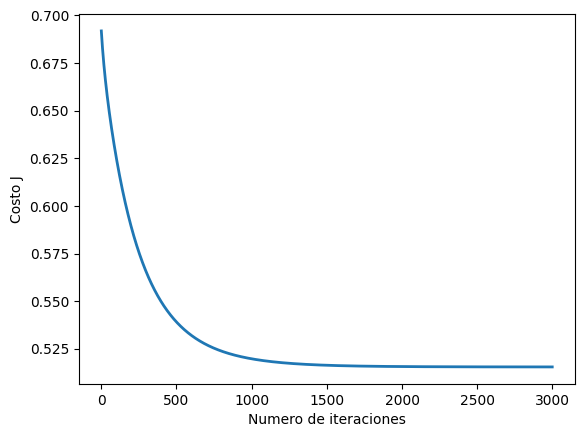

In [17]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.009

num_iters = 3000
lambda_ = 1000
# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(len(X_ready[0]))

theta, J_history = descensoGradiente(theta, X_ready, y_train, alpha, num_iters, lambda_)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# X_array = [1, 1, 80, 66, 28, 0, 33.4, 0.675, 46]
# aprueba = sigmoid(np.dot(X_array, theta))  

Validaciones

In [18]:
X_test = (X_test - mu) / sigma
X_test = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)

y_pred = []
for i in range(len(X_test)):
    y_pred.append(sigmoid(np.dot(X_test[i], theta.T)))
    
y_pred = np.array(y_pred)

y_umbral = (y_pred >= 0.5).astype(int)

print("la precision del modelo es: ", np.mean(y_umbral == y_test) * 100)


la precision del modelo es:  77.48333333333333
